In [ ]:
#Trends Observed:
    #Pyber usage is notably more popular in urban areas
    #The average fare is lower in urban areas compared to rural and suburban
    #There appears to be a slight negative coorelation between average fare and the total number of rides per city

In [1]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read in the csvs
data1 = pd.read_csv("city_data.csv")
data2 = pd.read_csv("ride_data.csv")

#merge the data sets on city

pyber_data = pd.merge(data1, data2, on="city")
pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [3]:
#Your objective is to build a Bubble Plot that showcases the relationship between four key variables:
    #y_axis - Average Fare ($) Per City
    #x_axis - Total Number of Rides Per City
    #size of the markers - Total Number of Drivers Per City
    #color of the markers - City Type (Urban, Suburban, Rural)

In [4]:
#create a new dataframe with columnes: city, average fare, driver count, and type
    #defining the values:
city_groups = pyber_data.groupby(["city"], as_index=False)
average_fare = city_groups[["fare"]].mean()
ride_counts = city_groups[["ride_id"]].count()
drivers = city_groups[["driver_count"]].mean()
city_type = city_groups[["type"]].first()
   
    #merging the desired values into one dataframe
merge1 = average_fare.merge(ride_counts, left_on= "city", right_on= "city", how="outer")
merge2 = merge1.merge(drivers, left_on= "city", right_on= "city", how="outer")
city_data = merge2.merge(city_type, left_on= "city", right_on= "city", how= "outer")
print(city_data.head())

#to be used for finding the axis min and max and use drivers as the size for scatter
fare = city_data.iloc[:,1]
ride = city_data.iloc[:,2]
drivers = city_data.iloc[:,3]


           city       fare  ride_id  driver_count      type
0  Alvarezhaven  23.928710       31            21     Urban
1    Alyssaberg  20.609615       26            67     Urban
2    Anitamouth  37.315556        9            16  Suburban
3  Antoniomouth  23.625000       22            21     Urban
4  Aprilchester  21.981579       19            49     Urban


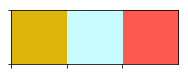

In [5]:
#defining the colors scheme
colors = ["gold", "light sky blue", "coral"]
sns.palplot(sns.xkcd_palette(colors))
type_colors = sns.xkcd_palette(colors)

(14.523000000000003, 54.62)

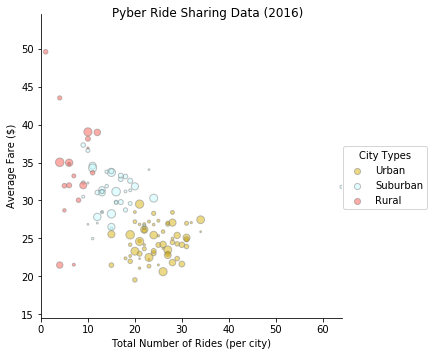

In [6]:
#Plotting using seaborn
    #renaming
city_data_renamed = city_data.rename(columns = {"ride_id": "Total Number of Rides (per city)", 
                                                "fare": "Average Fare ($)",
                                                "type": "City Types"
                                               })


#plotting with seaborn
lm = sns.lmplot(x="Total Number of Rides (per city)", y="Average Fare ($)", scatter_kws={"s": drivers, "edgecolor": "gray", "alpha": .5}, data=city_data_renamed, hue="City Types", palette=type_colors, fit_reg=False)

# Access the figure
pyber_fig = lm.fig

# Add a title to the Figure
pyber_fig.suptitle("Pyber Ride Sharing Data (2016)", fontsize=12)

#setting x and y limits for the scatter
plt.xlim(0,max(ride))
plt.ylim(min(fare)-5,max(fare)+5)


<function matplotlib.pyplot.show>

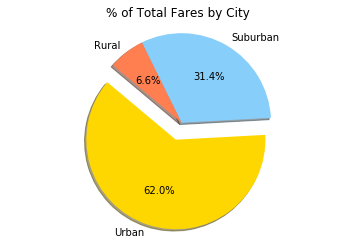

In [7]:
#pie charts

#finding totals (fare, drivers, rides)
total_fare = pyber_data["fare"].sum()
total_rides = pyber_data["ride_id"].count()
total_drivers = city_data["driver_count"].sum()

#creating dataframe for each city group from pyber data for rides and fares data
urban_data_rf = pyber_data.loc[pyber_data["type"]=="Urban"]
sub_data_rf = pyber_data.loc[pyber_data["type"]=="Suburban"]
rural_data_rf = pyber_data.loc[pyber_data["type"]=="Rural"]

#Pie for % of total fare by city type
u_fare_percent = (urban_data_rf[["fare"]].sum()/total_fare)
s_fare_percent = (sub_data_rf[["fare"]].sum()/total_fare)
r_fare_percent = (rural_data_rf[["fare"]].sum()/total_fare)

fare_percents = [u_fare_percent, s_fare_percent, r_fare_percent]
types = ["Urban", "Suburban", "Rural"]
pyber_colors = ["gold", "lightskyblue", "coral"]
explode1 = (0.2,0,0)


plt.title("% of Total Fares by City")
plt.pie(fare_percents, explode=explode1, labels=types, colors=pyber_colors,
        shadow=True, autopct="%1.1f%%", startangle=140)

plt.axis("equal")
plt.show


<function matplotlib.pyplot.show>

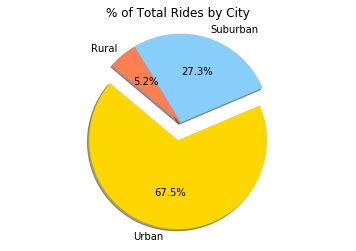

In [8]:
#Pie for % of total rides by city type
u_ride_percent = (urban_data_rf[["ride_id"]].count()/total_rides)
s_ride_percent = (sub_data_rf[["ride_id"]].count()/total_rides)
r_ride_percent = (rural_data_rf[["ride_id"]].count()/total_rides)

ride_percents = [u_ride_percent, s_ride_percent, r_ride_percent]
explode2 = (0.2,0,0)

plt.title("% of Total Rides by City")
plt.pie(ride_percents, explode=explode2, labels=types, colors=pyber_colors,
        shadow=True, autopct="%1.1f%%", startangle=140)

plt.axis("equal")
plt.show

<function matplotlib.pyplot.show>

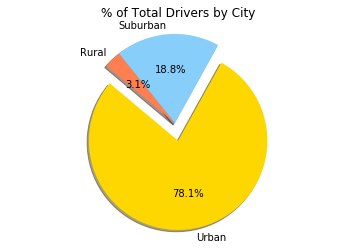

In [9]:
#Pie for % of total drivers by city
#creating dataframe for each city group from city data for drivers
urban_data_d = city_data.loc[city_data["type"]=="Urban"]
sub_data_d = city_data.loc[city_data["type"]=="Suburban"]
rural_data_d = city_data.loc[city_data["type"]=="Rural"]

u_driver_percent = (urban_data_d[["driver_count"]].sum()/total_drivers)
s_driver_percent = (sub_data_d[["driver_count"]].sum()/total_drivers)
r_driver_percent = (rural_data_d[["driver_count"]].sum()/total_drivers)

driver_percents = [u_driver_percent, s_driver_percent, r_driver_percent]
explode3 = (0.2,0,0)

plt.title("% of Total Drivers by City")
plt.pie(driver_percents, explode=explode3, labels=types, colors=pyber_colors,
        shadow=True, autopct="%1.1f%%", startangle=140)

plt.axis("equal")
plt.show